<AxesSubplot:title={'center':'Fallecimientos por edad'}, xlabel='edad'>

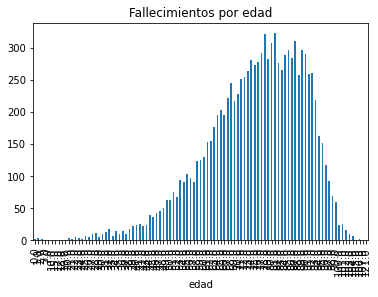

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

filePath = "D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_casos_covid_CABA.csv"
casos = pd.read_csv(filePath, parse_dates=['fecha_fallecimiento'])

casos['fecha_fallecimiento'] = pd.to_datetime(casos['fecha_fallecimiento'], format='%d%b%Y:%H:%M:%S.%f')
#casos.head()
sub = casos[["edad", "fecha_fallecimiento"]]
df = sub.dropna().groupby(['edad']).size()
#print(df)
df.plot(kind="bar", title="Fallecimientos por edad")

In [2]:
countList = sub.dropna().groupby(['edad']).size().reset_index(name='counts')
top = countList.sort_values("counts", ascending=False)
print("Top 5 mas fallecidos por edad")
top.head()

Top 5 mas fallecidos por edad


,edad,counts
71,81.0,323
68,78.0,321
77,87.0,310
70,80.0,307
79,89.0,297


In [3]:
descTop = countList.sort_values("counts", ascending=True)
print("Top 5 menos fallecidos por edad")
descTop.head()

Top 5 menos fallecidos por edad


,edad,counts
98,121.0,1
95,105.0,1
3,3.0,1
4,7.0,1
5,10.0,1


<AxesSubplot:title={'center':'Fallecidos por ser o no edad de riesgo'}, ylabel='None'>

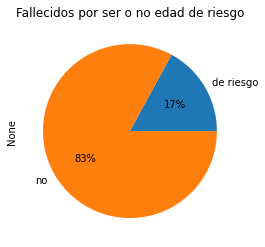

In [4]:
# Riesgo vs no riesgo. (+60)

def esDeRiesgo(edad):
    if edad >= 60:
        return 'de riesgo'
    else:
        return 'no'

casos['de_riesgo'] = casos.apply(lambda x: esDeRiesgo(x['edad']), axis=1)
sub = casos[['de_riesgo']]
df = sub.dropna().groupby(['de_riesgo']).size()

df.plot(kind="pie", title="Fallecidos por ser o no edad de riesgo", autopct='%1.f%%')

<AxesSubplot:title={'center':'Fallecidos por genero'}, ylabel='None'>

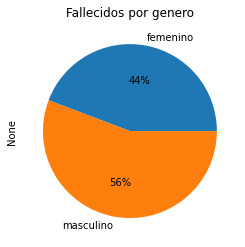

In [5]:
# Genero
sub = casos[["genero", "fecha_fallecimiento"]]
df = sub.dropna().groupby(['genero']).size()
#print(df)
df.plot(kind="pie", title="Fallecidos por genero", autopct='%1.f%%')

In [11]:
#cantidad de fallecidos por día
df_fallecidos = sub.dropna()
df_fallecidos.head(200)

groupFechaCount = df_fallecidos.groupby(["fecha_fallecimiento"])["genero"].count()
groupFechaCount.head(200)

fecha_fallecimiento
2020-03-07     1
2020-03-18     1
2020-03-25     2
2020-03-27     1
2020-03-28     1
              ..
2020-10-13    26
2020-10-14    27
2020-10-15    22
2020-10-16    16
2020-10-17    20
Name: genero, Length: 200, dtype: int64

<AxesSubplot:xlabel='fecha_fallecimiento'>

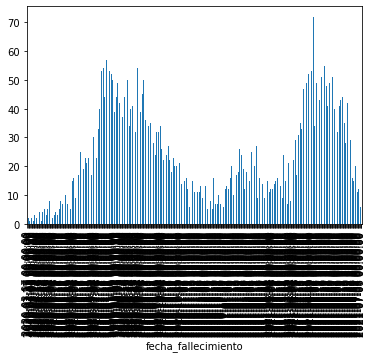

In [12]:
groupFechaCount.plot(kind="bar")

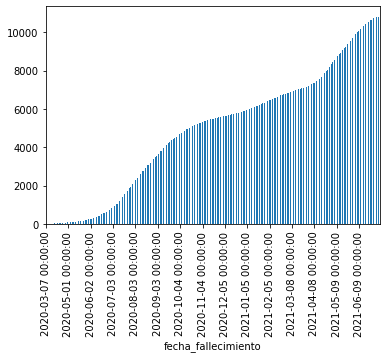

In [18]:
#Cantidad de fallecidos acumulada
fallecimientos_acumulados = df_fallecidos.groupby(["fecha_fallecimiento"])["genero"].count().cumsum()
fallecimientos_acumulados.plot(kind="bar").locator_params(axis="x", nbins=15)